In [1]:
import pandas as pd
import pickle
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\user\AppData\Local\Temp\ipykernel_24488\2143187077.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
df= pd.read_csv("data_2genre.csv")

In [4]:
df.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,pop.00024.au,117.453835,57,0.410990,0.207584,3301.781785,3175.656592,7302.597509,0.144527,-40.802069,...,-0.568772,0.552448,-1.981371,1.915755,0.076505,-1.270496,1.233082,1.493700,0.949931,1
1,pop.00099.au,78.302557,38,0.360462,0.138195,2765.747194,3222.713605,6873.391771,0.096015,-119.320605,...,1.566938,-2.932391,-1.609138,-0.200545,-2.429376,1.207988,5.848729,1.609469,7.580263,1
2,pop.00009.au,107.666016,50,0.454810,0.159711,3279.877315,3026.391118,6953.099622,0.172819,-35.277026,...,-0.518891,0.212918,-1.294660,-0.105626,-1.245879,-2.528455,0.571032,1.569434,-1.724873,1
3,pop.00078.au,103.359375,52,0.454698,0.223419,3124.176350,2970.320532,6618.134981,0.142721,-42.757179,...,3.020176,-1.242321,-3.524069,-0.325165,-1.443294,-1.864617,-0.031307,-0.729631,-0.987611,1
4,pop.00037.au,103.359375,51,0.451668,0.240985,3236.413205,2953.596262,6698.776160,0.164825,4.821123,...,1.753352,3.336132,2.352307,1.428845,-0.604926,-2.185691,-1.602394,-0.612146,-4.050126,1


In [5]:
df.tail()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
195,classical.00020.au,143.554688,69,0.269065,0.038438,1218.290508,1353.616224,2295.177788,0.069813,-300.937697,...,-1.808325,-4.104602,-2.045668,-1.596437,0.646648,1.454414,-0.221094,-1.292084,-7.100527,2
196,classical.00072.au,117.453835,57,0.279421,0.020732,1284.921775,1659.622614,2476.568358,0.063750,-360.821769,...,4.684600,3.343187,-2.251255,-1.852868,2.215029,1.784788,-1.519674,-3.253521,3.998950,2
197,classical.00061.au,151.999081,76,0.281670,0.048189,1322.026416,1590.233329,2473.626709,0.076126,-274.426858,...,-4.592368,-1.540610,-3.028737,-4.697145,-7.715005,-7.212517,-5.410751,-5.246985,-5.270150,2
198,classical.00008.au,135.999178,67,0.254774,0.034038,1516.626219,1629.500705,2973.782018,0.078788,-292.128300,...,4.709107,0.377206,1.464333,3.393674,6.076538,0.963429,-0.753660,-2.105312,0.755132,2
199,classical.00084.au,112.347147,25,0.245491,0.021982,1001.400439,1151.028078,1731.722862,0.057948,-369.184224,...,-9.797995,-5.051084,-5.084386,-3.038442,-1.718458,-1.849090,-2.257478,-1.273307,-0.441167,2


In [6]:
df.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,119.896118,55.605000,0.330516,0.121342,2213.827679,2264.973183,4568.788040,0.105623,-193.933982,104.612778,...,-0.181143,-1.285880,-0.717986,-0.499806,0.035002,-0.100388,0.549379,-0.108176,-0.379320,1.500000
std,30.112891,15.691722,0.084184,0.092350,985.867013,798.344395,2323.849307,0.042441,149.931065,42.927715,...,4.754908,4.217877,4.261599,3.761752,4.102517,3.894046,3.680286,3.271097,3.431767,0.501255
min,58.726918,18.000000,0.181161,0.005276,690.075902,897.994319,749.062137,0.031538,-552.064063,32.351664,...,-15.805227,-17.465421,-11.930792,-10.189898,-13.840137,-10.179055,-11.975698,-9.139271,-8.060386,1.000000
25%,99.384014,46.000000,0.258248,0.031874,1347.129607,1521.334572,2475.832946,0.072016,-315.171960,64.449632,...,-3.148961,-4.074475,-3.471445,-2.810213,-2.440365,-2.362097,-1.965310,-2.155562,-2.827388,1.000000
50%,112.347147,53.000000,0.319846,0.115266,1978.153346,2282.710723,4096.850227,0.098227,-160.977130,103.129688,...,-0.138695,-1.225230,-0.644514,-0.476842,-0.374491,-0.347750,0.584017,-0.132256,-0.385403,1.500000
75%,135.999178,63.250000,0.404738,0.203261,3142.027145,3051.903827,6879.118820,0.136022,-52.513953,142.466745,...,2.623939,1.877754,1.808364,1.506955,2.272164,2.148825,2.479095,2.041620,1.701538,2.000000
max,234.907670,117.000000,0.522647,0.398012,4225.662023,3509.578677,8676.405868,0.230045,24.490849,190.791967,...,18.226380,8.493653,18.161663,12.357588,11.609025,11.489994,15.379257,14.686910,11.511355,2.000000


In [7]:
df.columns

Index(['filename', 'tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20', 'label'],
      dtype='object')

In [9]:
df['label'].unique()

array([1, 2], dtype=int64)

C:\Users\user\AppData\Local\Temp\ipykernel_24488\1032560776.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(10,5))


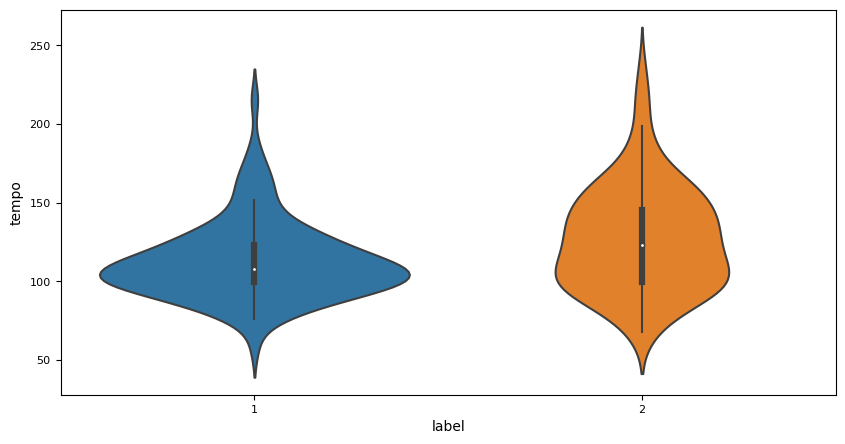

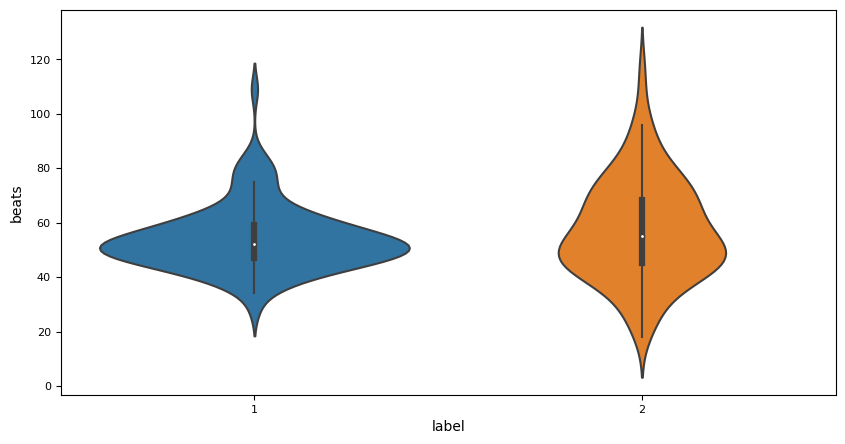

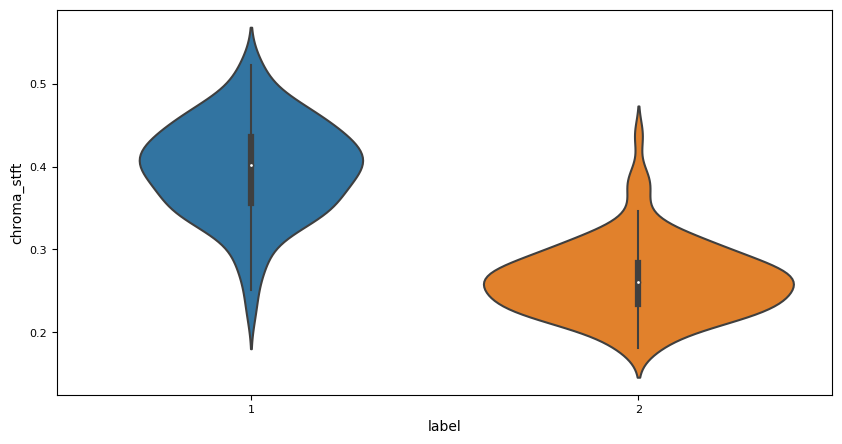

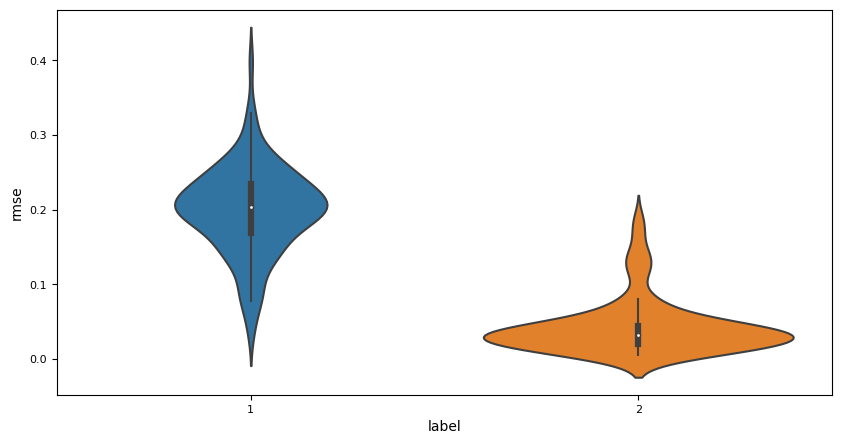

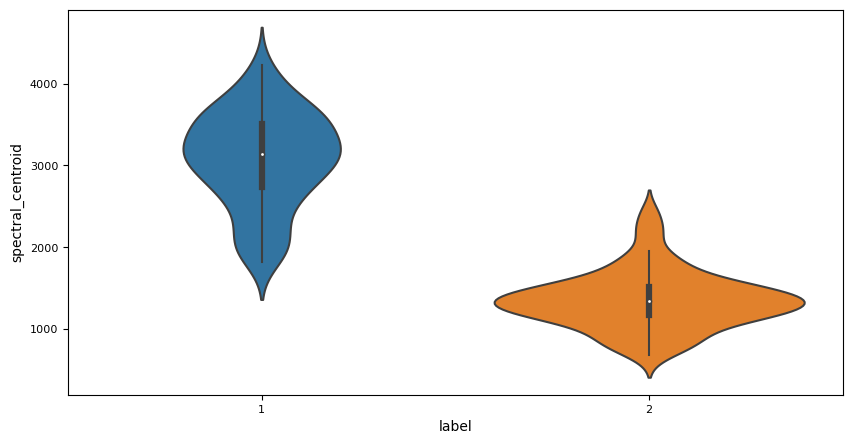

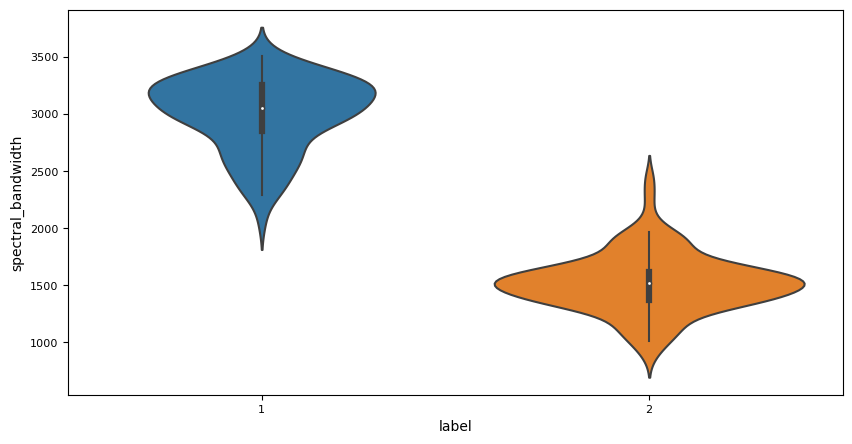

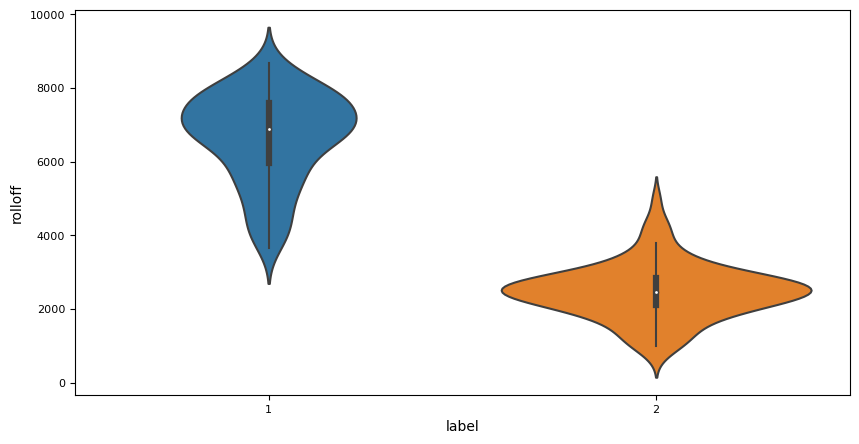

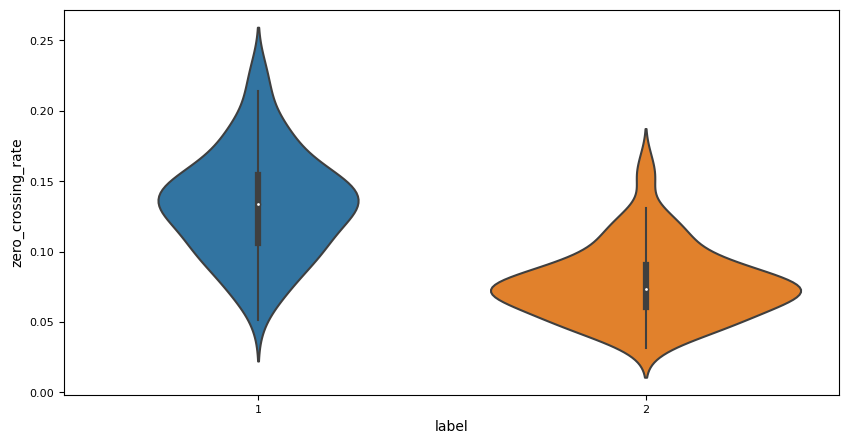

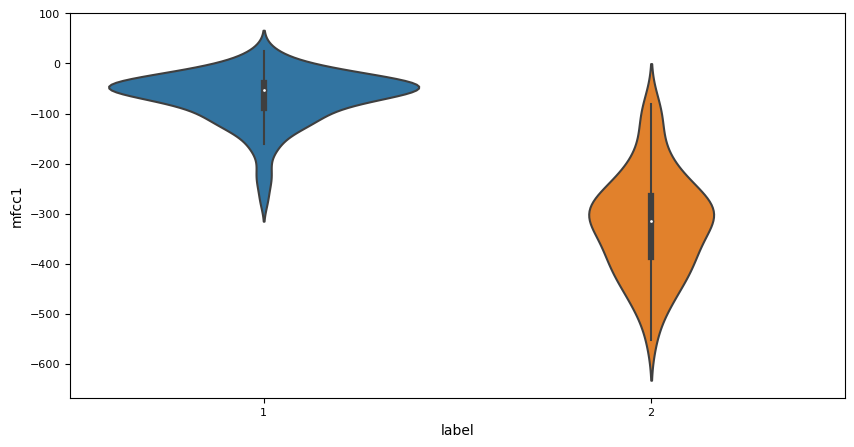

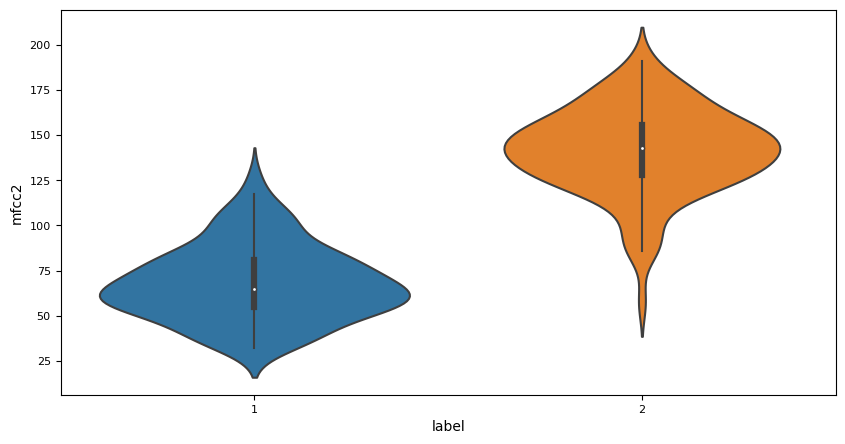

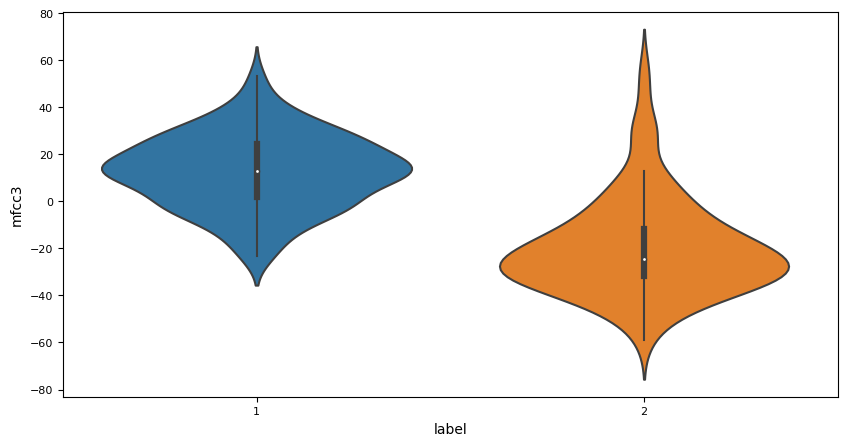

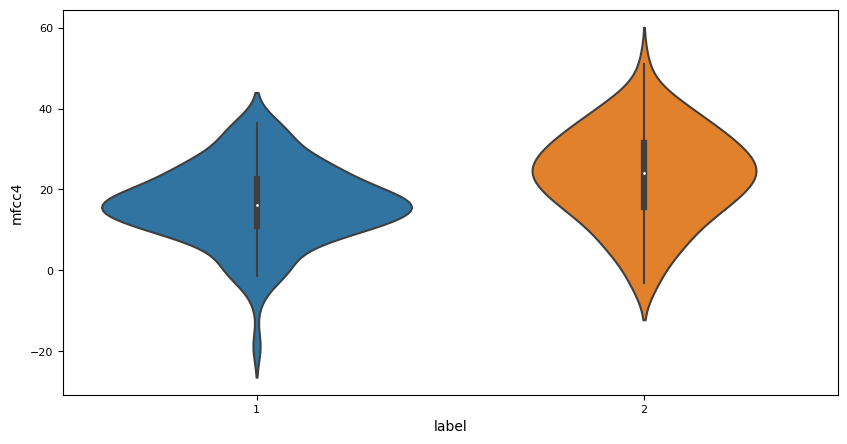

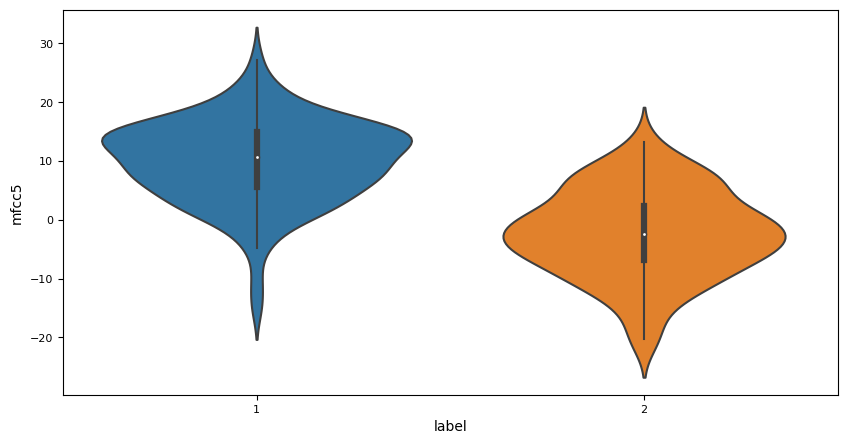

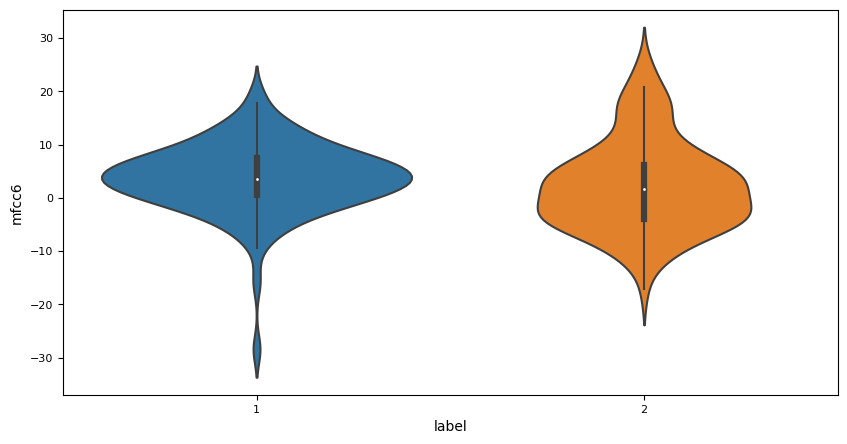

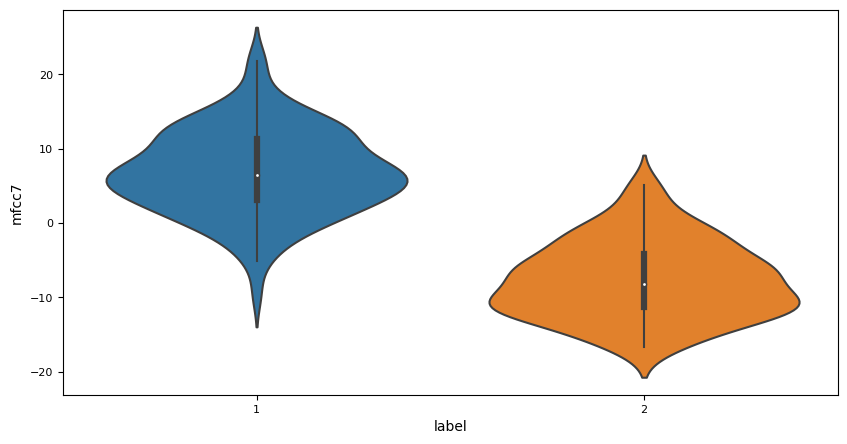

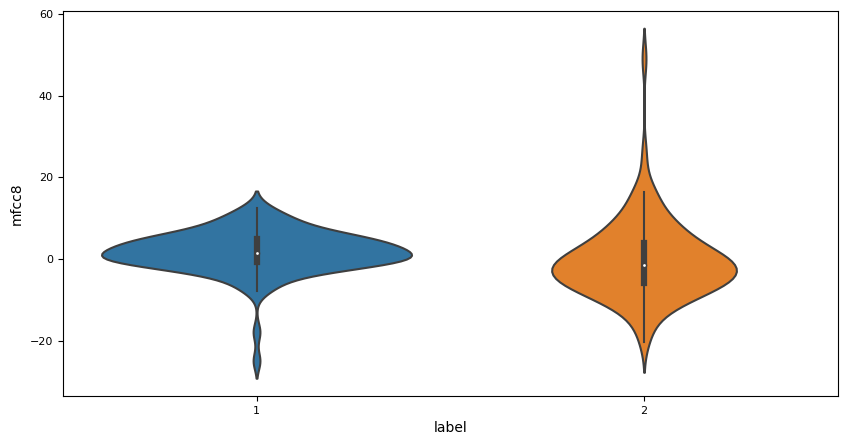

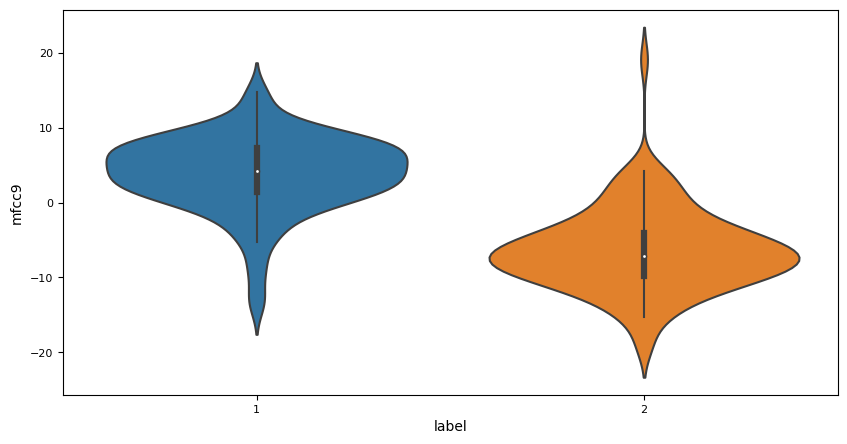

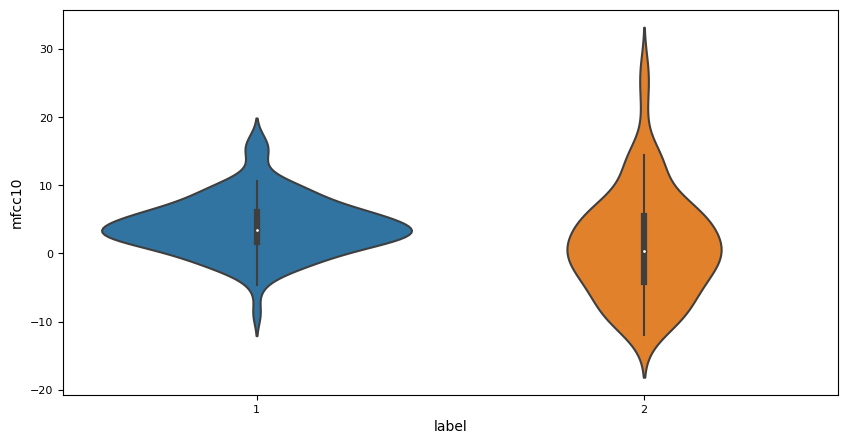

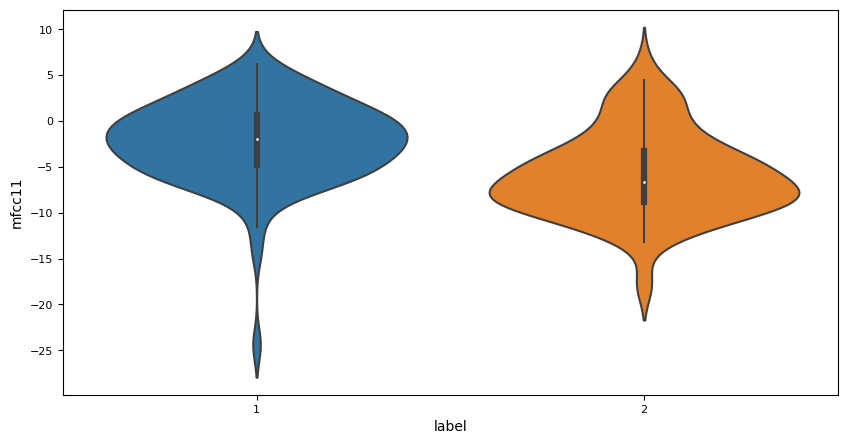

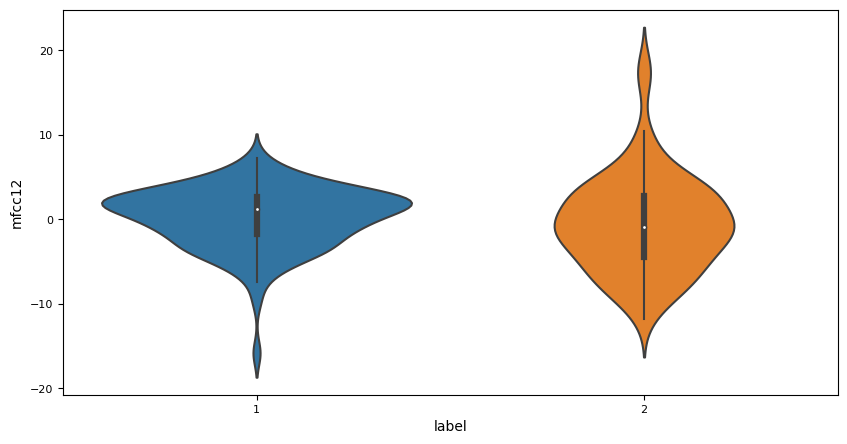

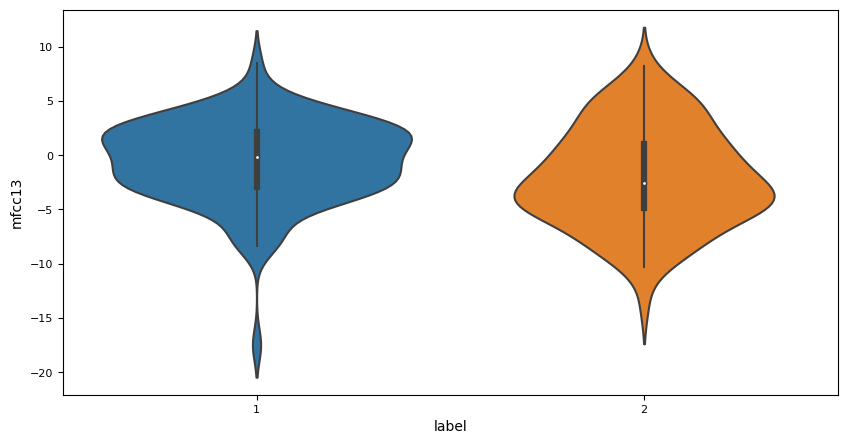

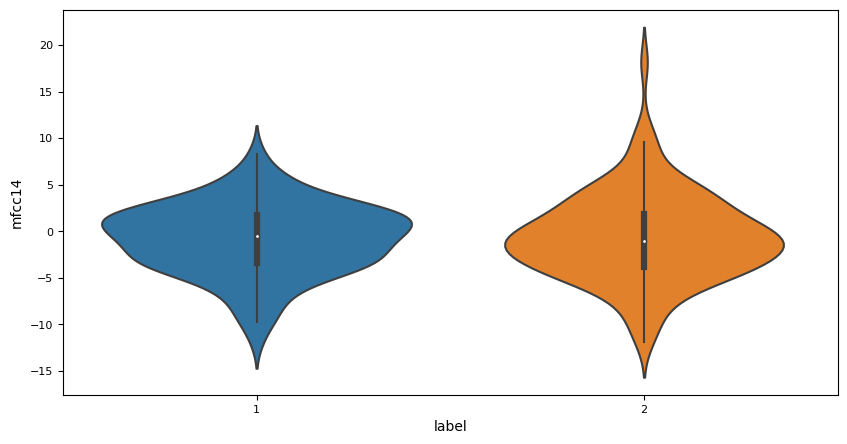

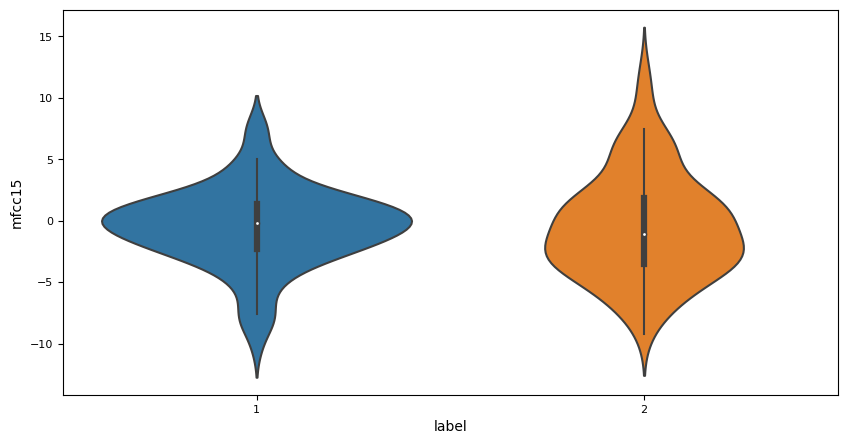

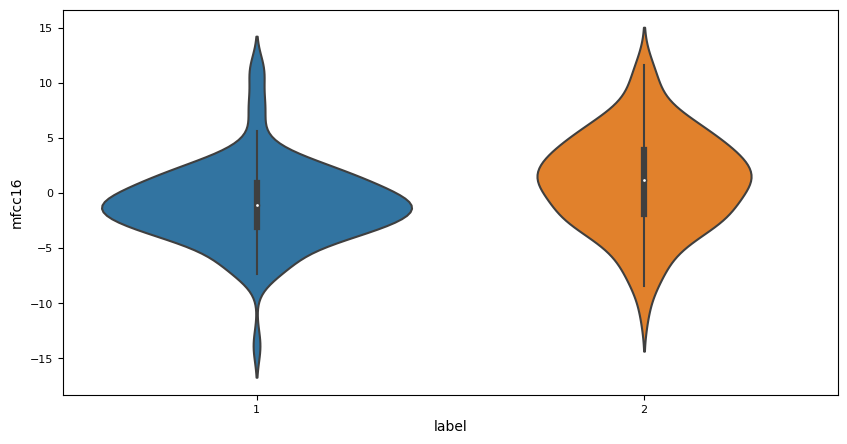

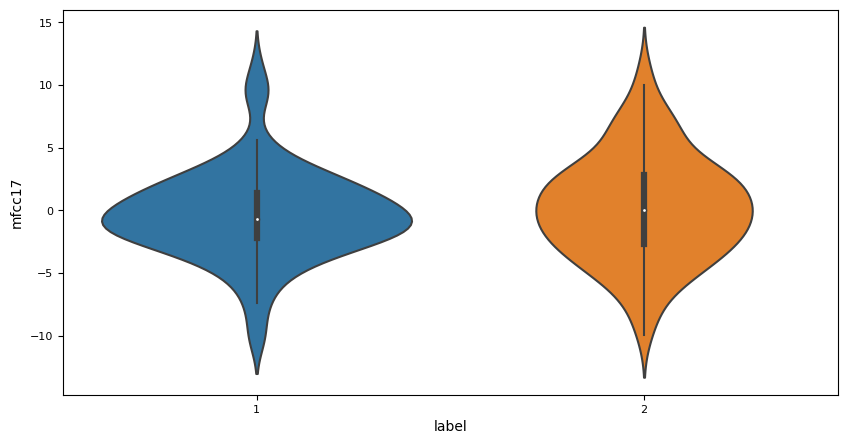

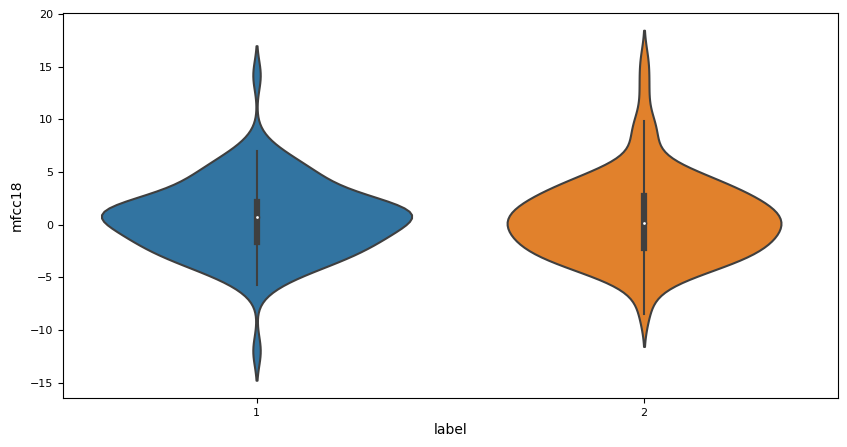

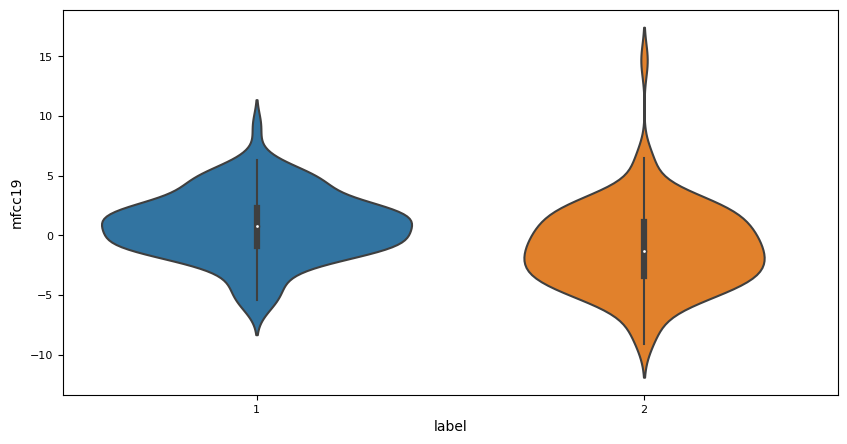

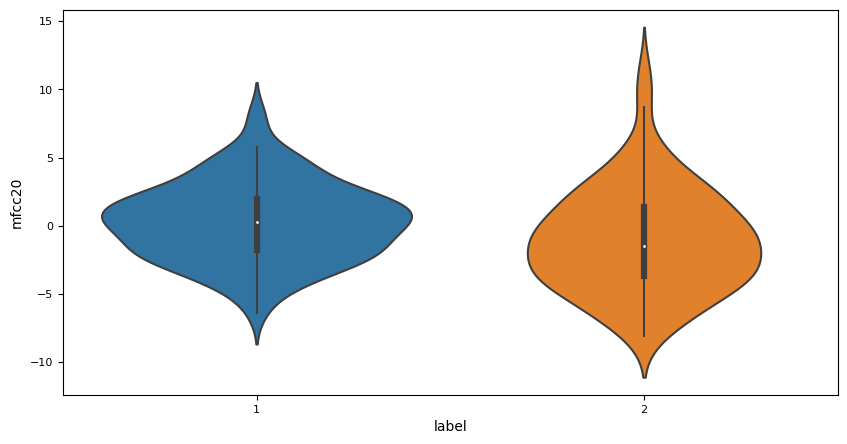

In [13]:
features = list(df.columns)
features.remove('filename')
features.remove('label')


for feat in features:
    fig, ax = plt.subplots(figsize=(10,5))
    ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
    sns.violinplot(data=df, x='label', y=feat, figsize=(10,5))

In [14]:
df.isnull().sum()

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [17]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']

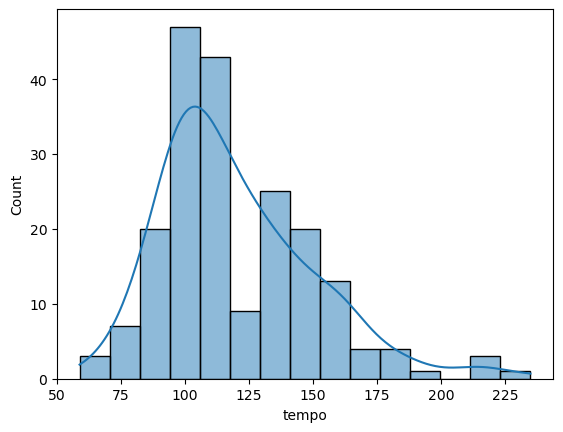

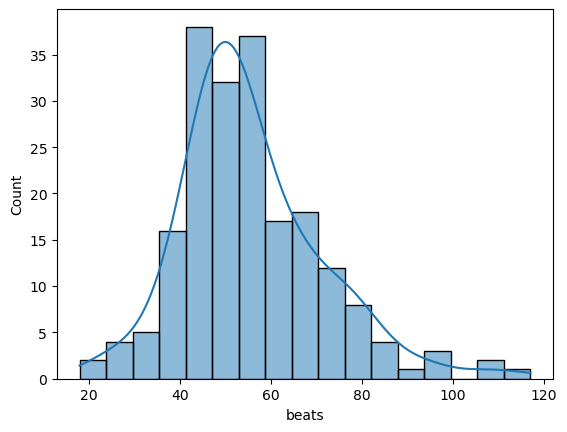

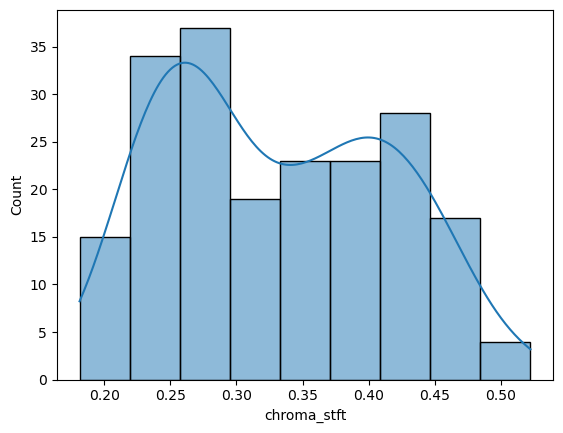

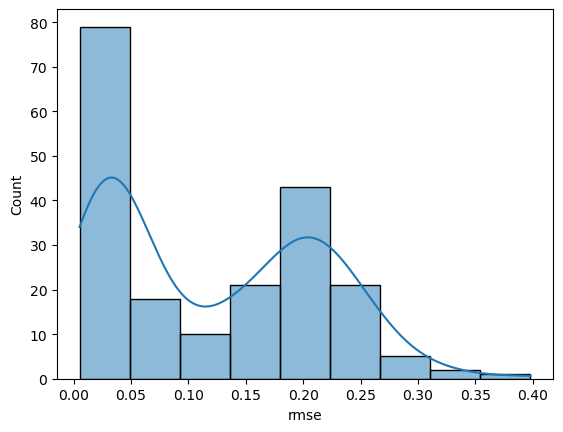

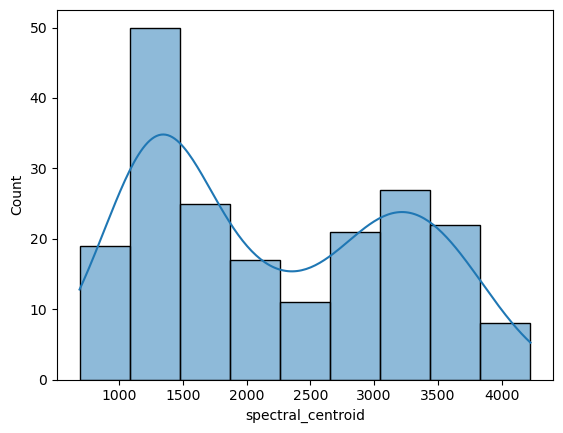

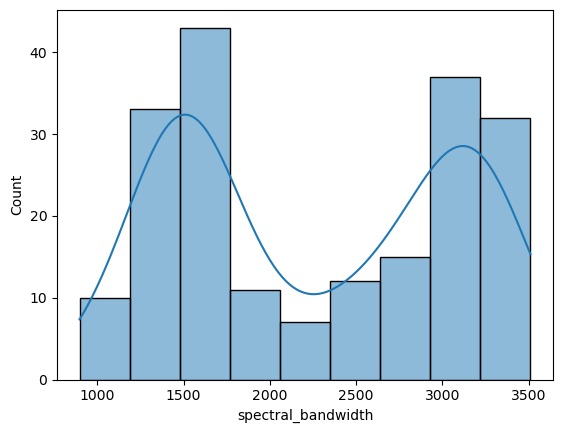

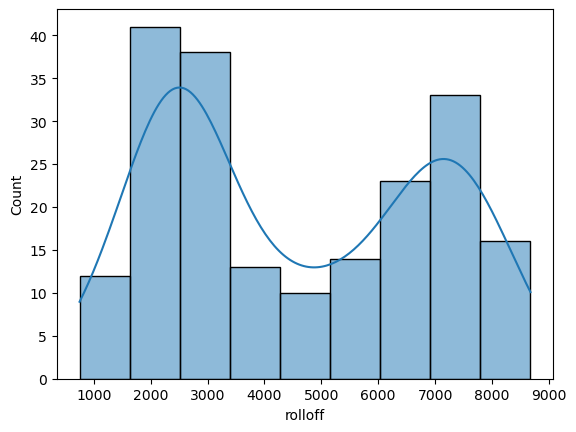

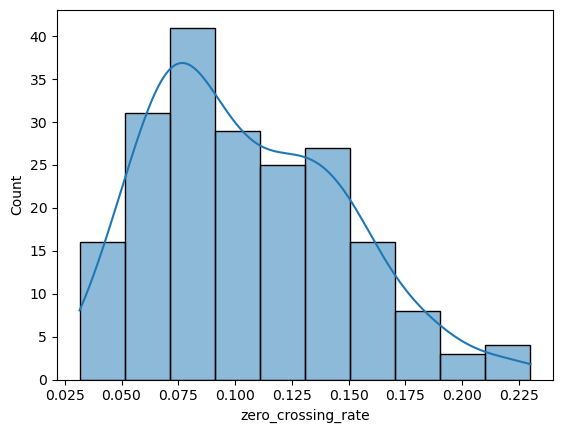

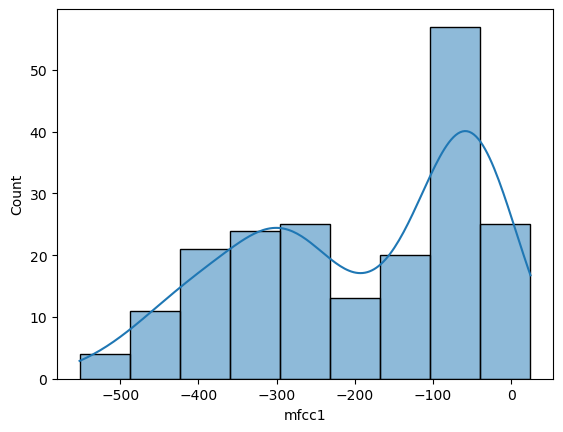

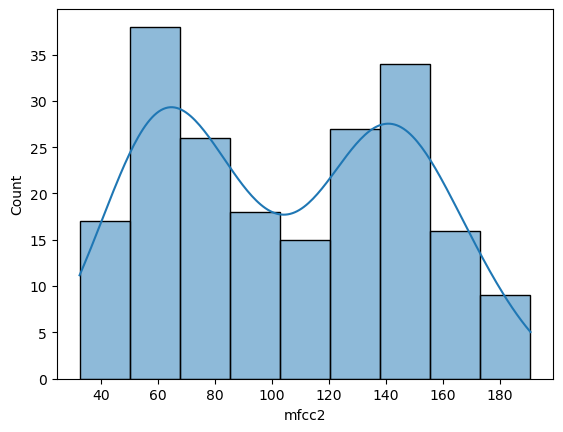

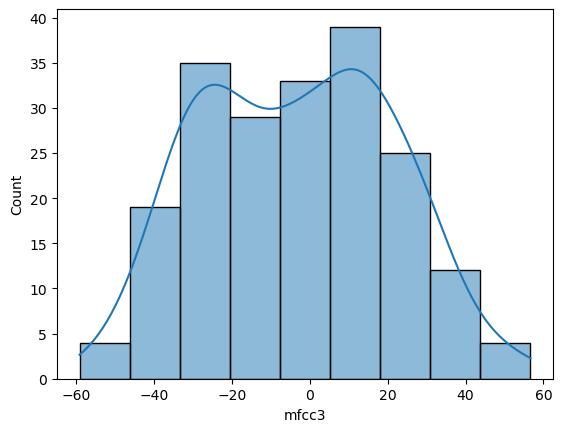

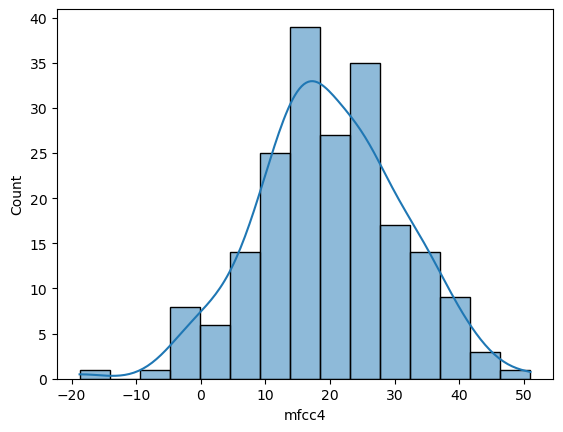

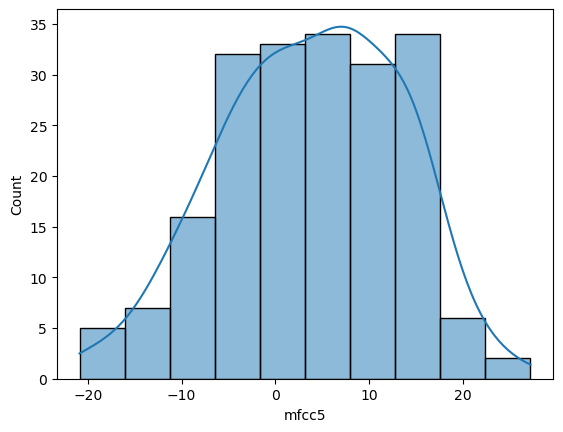

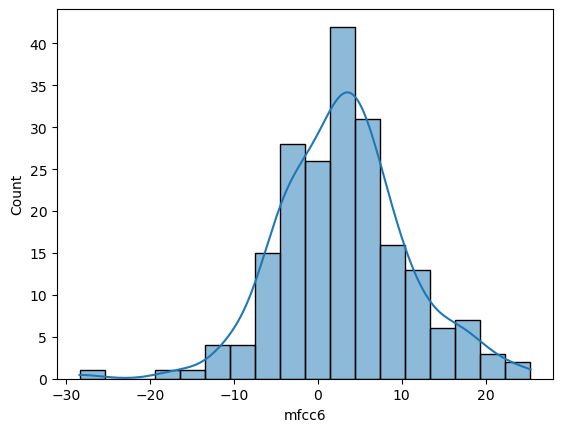

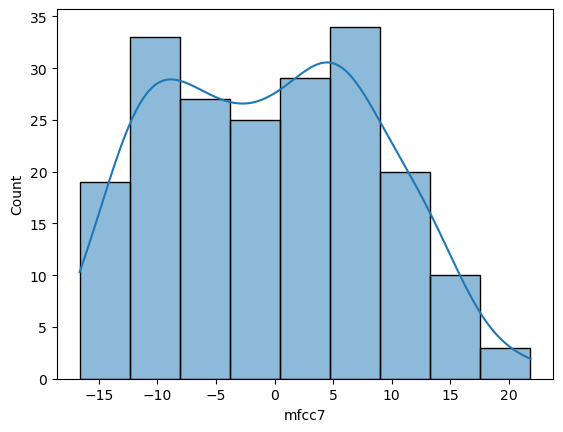

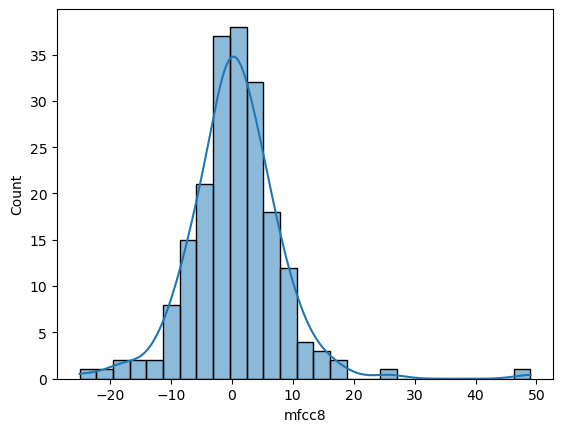

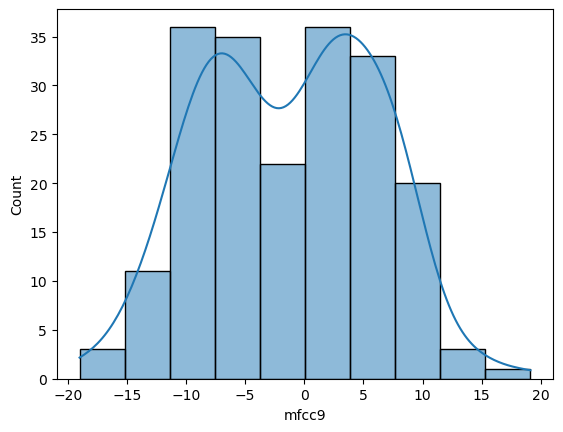

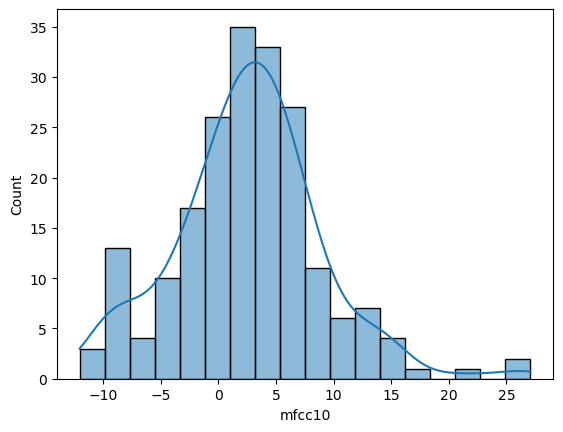

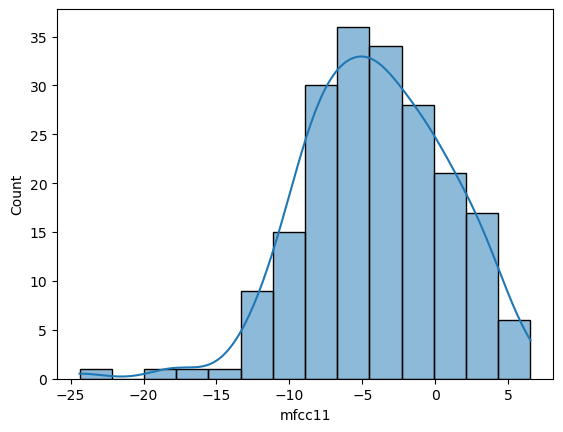

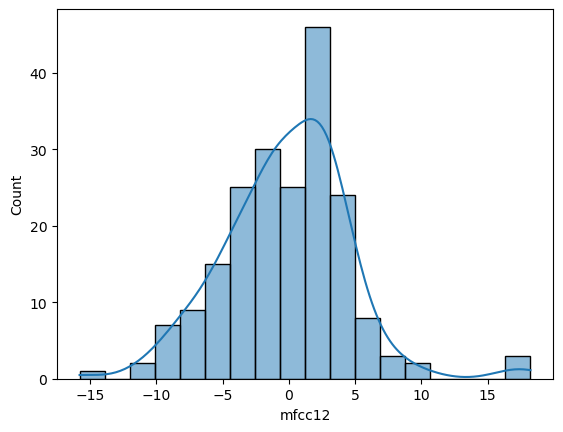

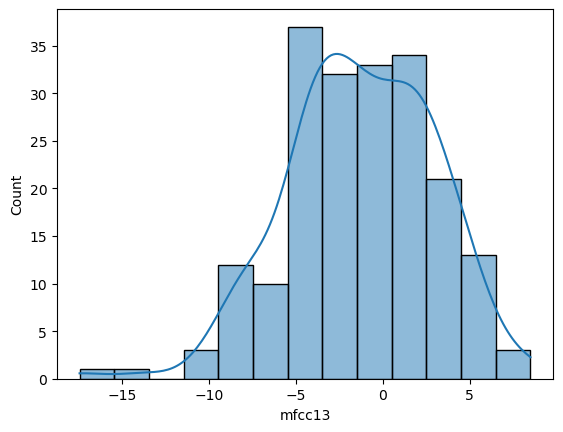

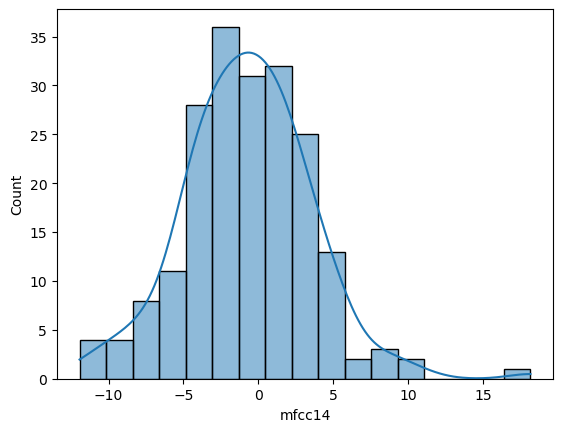

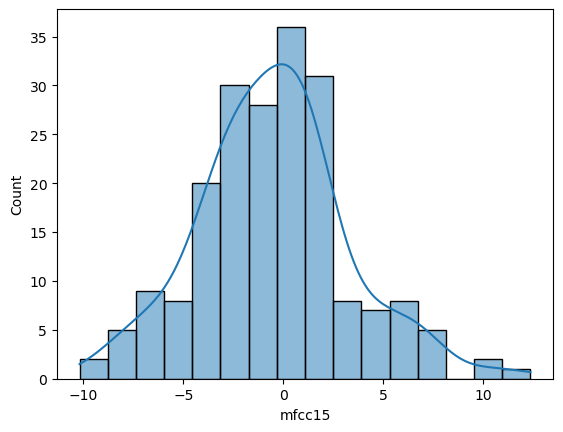

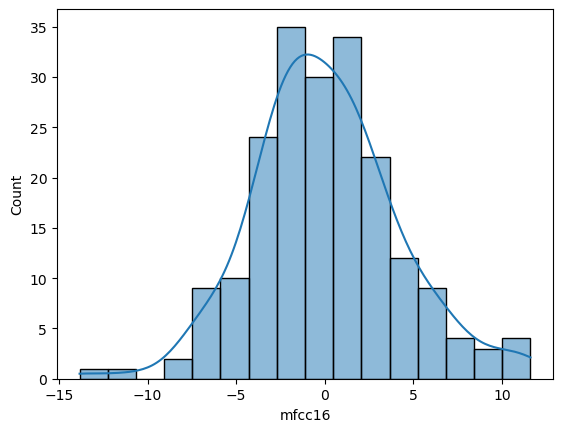

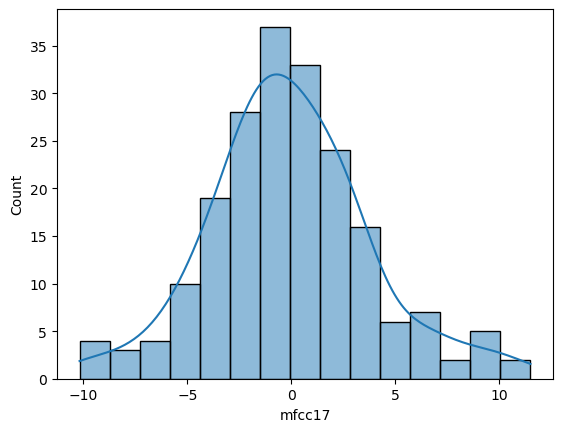

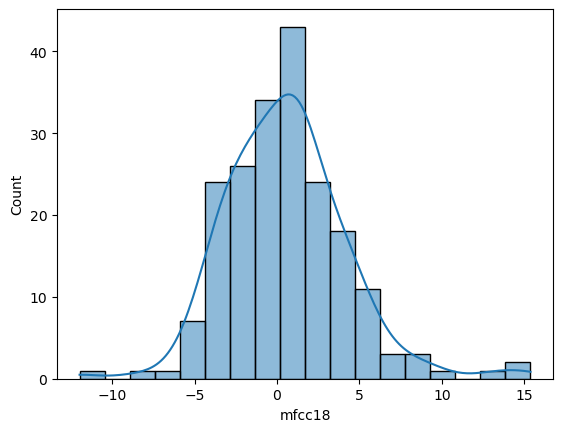

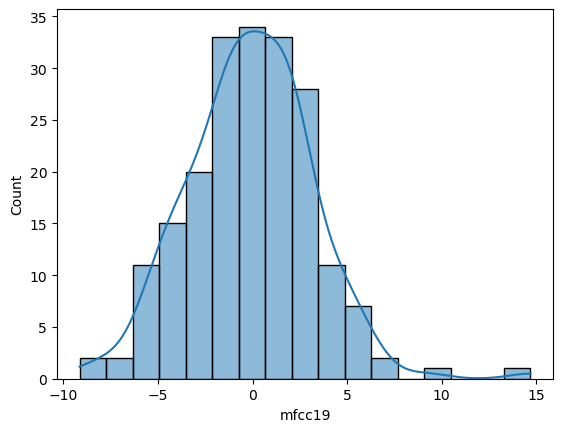

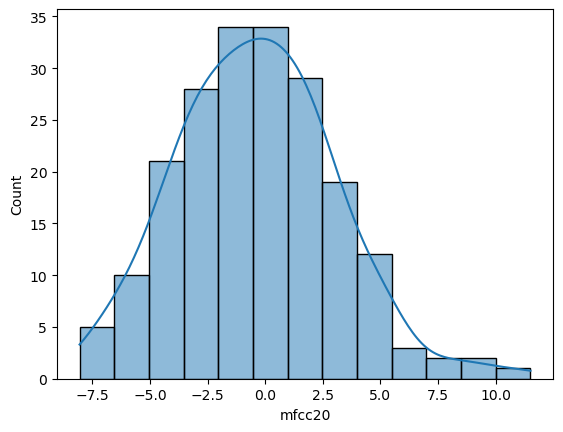

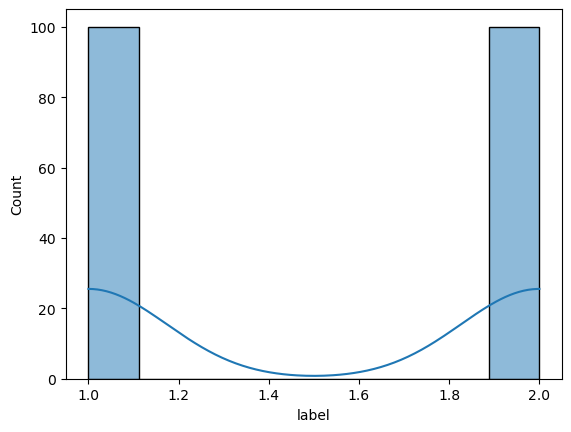

In [19]:
for i in numerical_features:
    sns.histplot(data=df , x=i ,kde=True )
    plt.show()

In [20]:
categorical_features

['filename']

In [21]:
df.drop(labels='filename',axis=1,inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tempo               200 non-null    float64
 1   beats               200 non-null    int64  
 2   chroma_stft         200 non-null    float64
 3   rmse                200 non-null    float64
 4   spectral_centroid   200 non-null    float64
 5   spectral_bandwidth  200 non-null    float64
 6   rolloff             200 non-null    float64
 7   zero_crossing_rate  200 non-null    float64
 8   mfcc1               200 non-null    float64
 9   mfcc2               200 non-null    float64
 10  mfcc3               200 non-null    float64
 11  mfcc4               200 non-null    float64
 12  mfcc5               200 non-null    float64
 13  mfcc6               200 non-null    float64
 14  mfcc7               200 non-null    float64
 15  mfcc8               200 non-null    float64
 16  mfcc9   

In [39]:
df.head(10)

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,117.453835,57,0.410990,0.207584,3301.781785,3175.656592,7302.597509,0.144527,-40.802069,61.522054,...,-0.568772,0.552448,-1.981371,1.915755,0.076505,-1.270496,1.233082,1.493700,0.949931,1
1,78.302557,38,0.360462,0.138195,2765.747194,3222.713605,6873.391771,0.096015,-119.320605,85.941142,...,1.566938,-2.932391,-1.609138,-0.200545,-2.429376,1.207988,5.848729,1.609469,7.580263,1
2,107.666016,50,0.454810,0.159711,3279.877315,3026.391118,6953.099622,0.172819,-35.277026,61.242109,...,-0.518891,0.212918,-1.294660,-0.105626,-1.245879,-2.528455,0.571032,1.569434,-1.724873,1
3,103.359375,52,0.454698,0.223419,3124.176350,2970.320532,6618.134981,0.142721,-42.757179,62.799474,...,3.020176,-1.242321,-3.524069,-0.325165,-1.443294,-1.864617,-0.031307,-0.729631,-0.987611,1
4,103.359375,51,0.451668,0.240985,3236.413205,2953.596262,6698.776160,0.164825,4.821123,64.495215,...,1.753352,3.336132,2.352307,1.428845,-0.604926,-2.185691,-1.602394,-0.612146,-4.050126,1
5,99.384014,46,0.394441,0.256611,2944.367954,3162.393034,6877.683412,0.115115,-44.184857,76.175807,...,2.726388,4.517889,2.856290,1.322723,1.799121,0.376890,-1.123874,-0.438591,1.570071,1
6,129.199219,63,0.251577,0.084314,1968.420512,2326.835760,4127.150044,0.082345,-224.429648,107.307478,...,2.071808,6.198722,8.333522,7.580192,2.068624,4.557361,1.222659,-1.639573,-3.712766,1
7,103.359375,48,0.393404,0.210742,3759.753679,3293.733613,7855.044168,0.177674,-44.257500,51.329671,...,1.321999,-1.947375,-0.448469,0.233977,-2.005988,-1.966861,-1.036370,0.514916,-0.384858,1
8,107.666016,52,0.384338,0.211234,2753.175473,2861.394250,5986.147136,0.123763,-20.881365,83.238778,...,-0.637433,-3.172675,1.544838,-0.921805,-2.961459,-1.329166,-0.867002,0.697110,-1.764898,1
9,92.285156,45,0.409987,0.129401,1837.123244,2066.889874,3670.894469,0.085352,-125.889050,126.625202,...,3.883525,-7.945909,2.053949,-2.337939,-1.483331,4.753721,-3.514642,4.894724,-3.201470,1


In [40]:
for i in df.columns:
    df[i]= np.where(df[i]<0 , abs(df[i]), df[i])

In [41]:
df.head()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,117.453835,57,0.410990,0.207584,3301.781785,3175.656592,7302.597509,0.144527,40.802069,61.522054,...,0.568772,0.552448,1.981371,1.915755,0.076505,1.270496,1.233082,1.493700,0.949931,1
1,78.302557,38,0.360462,0.138195,2765.747194,3222.713605,6873.391771,0.096015,119.320605,85.941142,...,1.566938,2.932391,1.609138,0.200545,2.429376,1.207988,5.848729,1.609469,7.580263,1
2,107.666016,50,0.454810,0.159711,3279.877315,3026.391118,6953.099622,0.172819,35.277026,61.242109,...,0.518891,0.212918,1.294660,0.105626,1.245879,2.528455,0.571032,1.569434,1.724873,1
3,103.359375,52,0.454698,0.223419,3124.176350,2970.320532,6618.134981,0.142721,42.757179,62.799474,...,3.020176,1.242321,3.524069,0.325165,1.443294,1.864617,0.031307,0.729631,0.987611,1
4,103.359375,51,0.451668,0.240985,3236.413205,2953.596262,6698.776160,0.164825,4.821123,64.495215,...,1.753352,3.336132,2.352307,1.428845,0.604926,2.185691,1.602394,0.612146,4.050126,1


In [42]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
df_scaled= scaler.fit_transform(df)

In [43]:
from sklearn.cluster import KMeans

In [44]:
df_scaled

array([[-0.08130776,  0.08912347,  0.95832556, ..., -0.50983787,
        -0.85282219, -1.        ],
       [-1.38472047, -1.12474455,  0.35661418, ..., -0.45340592,
         2.31473624, -1.        ],
       [-0.40716094, -0.35809106,  1.48016171, ..., -0.47292118,
        -0.48260306, -1.        ],
       ...,
       [ 1.06876229,  1.30299148, -0.58168745, ...,  1.31970824,
         1.21110879,  1.        ],
       [ 0.53609827,  0.72800137, -0.90198267, ..., -0.21170619,
        -0.94588468,  1.        ],
       [-0.25131811, -1.95528582, -1.01252718, ..., -0.61726888,
        -1.09587761,  1.        ]])

In [46]:
from sklearn.decomposition import PCA
pca = PCA()

In [47]:
prinipal_component = pca.fit_transform(df_scaled)

Text(0, 0.5, 'eVR')

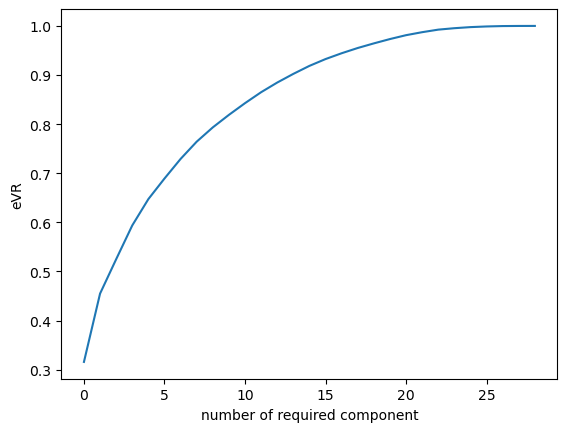

In [48]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of required component")
plt.ylabel("eVR")

In [59]:
x=df.iloc[:,0:3]

In [60]:
x

,tempo,beats,chroma_stft
0,117.453835,57,0.410990
1,78.302557,38,0.360462
2,107.666016,50,0.454810
3,103.359375,52,0.454698
4,103.359375,51,0.451668
...,...,...,...
195,143.554688,69,0.269065
196,117.453835,57,0.279421
197,151.999081,76,0.281670
198,135.999178,67,0.254774


In [61]:
from sklearn.cluster import DBSCAN

In [62]:
dbscan= DBSCAN(eps=1, min_samples=3)

In [63]:
dbscan.fit(x)

DBSCAN(eps=1, min_samples=3)

In [64]:
dbscan.labels_

array([ 0, -1, -1, -1,  1,  2,  3, -1,  4, -1,  1,  5, -1,  6, -1,  7,  8,
       -1, -1,  2, -1,  0, -1,  9, 10,  3, 11, -1,  5, -1, -1, -1, -1, -1,
        1, -1, -1, 12,  6,  8, 13, -1, -1, -1, -1,  3, -1, 12,  4, -1, -1,
        7, -1, 14, -1, -1, -1,  1,  9, -1, 11, 15, -1, -1, -1, -1,  2, -1,
       14, -1, -1, -1, 12, 16, 11,  0, -1, 10, -1,  4, -1, -1, -1, 13, -1,
       -1, -1, -1, 16,  1, -1, -1, 15, 16, -1, 14, -1, -1, -1, -1, -1, -1,
        7, -1, -1, -1,  8, -1,  9, -1, 13, -1, -1, -1, 17, -1, -1, -1, -1,
       -1, -1, -1, -1, 18, -1, -1, -1, -1, -1, 18, -1, -1, -1, -1, -1, -1,
        8, -1,  9, -1, -1, -1, 18, -1, -1, -1, -1, 18, 13, -1, -1, -1, 17,
       -1, 11, -1, -1, 10, -1, -1, -1, -1, 10, -1, -1, 19,  4, -1, -1, -1,
       -1, -1, -1, -1, -1, 15,  7, -1, -1, -1,  5, -1, -1, -1,  6, -1, 10,
       19, -1, -1, -1, -1, 17, -1, -1,  7,  0, -1, 19, -1], dtype=int64)

In [65]:
set(dbscan.labels_)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [66]:
x['Cluster number']=dbscan.labels_

In [67]:
x

,tempo,beats,chroma_stft,Cluster number
0,117.453835,57,0.410990,0
1,78.302557,38,0.360462,-1
2,107.666016,50,0.454810,-1
3,103.359375,52,0.454698,-1
4,103.359375,51,0.451668,1
...,...,...,...,...
195,143.554688,69,0.269065,7
196,117.453835,57,0.279421,0
197,151.999081,76,0.281670,-1
198,135.999178,67,0.254774,19


In [ ]:
from above we can make out there are 20 different types of genres as value of cluster ranges from 0 to 19